In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [ ]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [6]:
df = pd.read_csv("world_data_full_apply_nulos.csv", index_col=0)

df.head(5)

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe
2,Algeria,18.0,DZ,17.4,NaN,317.0,24.28,213.0,Algiers,150.006,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,NaN,41.2,37.2,66.1,11.70,NaN,28.033886,1.659626,Africa
3,Andorra,164.0,AD,40.0,468.000,NaN,7.20,376.0,Andorra la Vella,469.000,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77.142,NaN,NaN,NaN,NaN,67.873,42.506285,1.521801,Europe
4,Angola,26.0,AO,47.5,NaN,117.0,40.73,244.0,Luanda,34.693,261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,NaN,77.5,9.2,49.1,6.89,NaN,-11.202692,17.873887,Africa


# Pair Visualización

Ejercicios visualización

A lo largo de este ejercicio plantearemos una serie de preguntas que tendrás que contestar usando la visualización (podréis usar tanto Seaborn como Matplotlib).

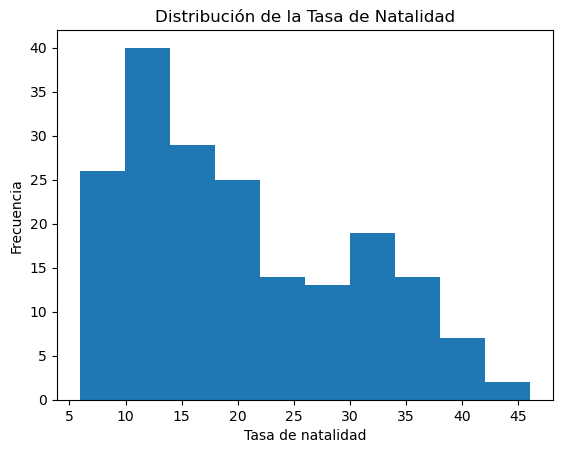

In [ ]:
# ¿Cómo se distribuye la tasa de natalidad en el conjunto de datos? ¿Hay algún patrón evidente?  Tendencia decreciente. En la mayoria de los paises la tasa de natalidad es baja 
plt.hist(x = "birth_rate", 
         data = df);
plt.title("Distribución de la Tasa de Natalidad")
plt.xlabel("Tasa de natalidad")
plt.ylabel("Frecuencia")
plt.show()

<Axes: xlabel='birth_rate'>

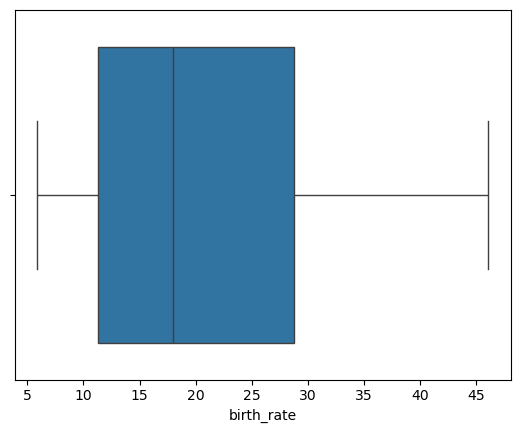

In [20]:
sns.boxplot(x = "birth_rate", 
         data = df)

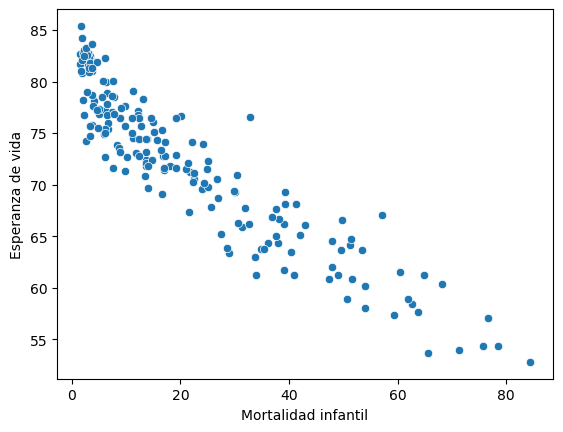

In [18]:
# ¿Existe una relación aparente entre la tasa de mortalidad infantil y la esperanza de vida? Proporciona una breve descripción de los patrones que observes. infant_mortality // life_expectancy

# creamos una gráfica básica usando 'sns.scatterplot()' 
# como ya lo hemos aprendido, vamos a cambiar el nombre de los ejes usando los métodos 'plt.xlabel()'  y 'plt.ylabel()' 
sns.scatterplot(x = "infant_mortality", 
                y = "life_expectancy", 
                data = df)

# cambiamos los nombres de los ejes
plt.xlabel("Mortalidad infantil")
plt.ylabel("Esperanza de vida");

,continent,life_expectancy
0,Africa,63.60
1,Asia,73.05
2,Central America,74.45
3,Europe,80.90
4,North America,80.20
5,Oceania,69.70
6,South America,75.70


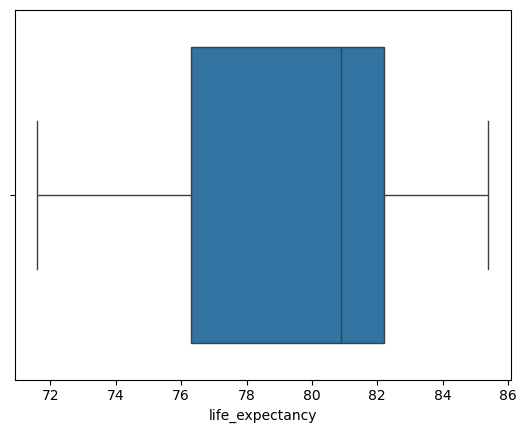

In [ ]:
#¿Cuál es la mediana de la esperanza de vida en Europa?  80.9  Proporciona un rango intercuartil aproximado  76 - 82 y verifica si existen valores atípicos, no existen valores atipicos

sns.boxplot(x = "life_expectancy", 
         data = df[df["continent"] == "Europe"])

df.groupby("continent")["life_expectancy"].median().reset_index()

<Axes: xlabel='life_expectancy', ylabel='continent'>

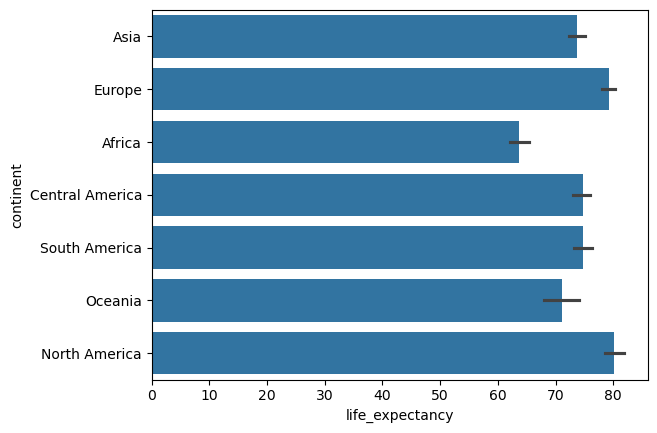

In [36]:
sns.barplot(x = "life_expectancy", y = "continent",
         data = df)

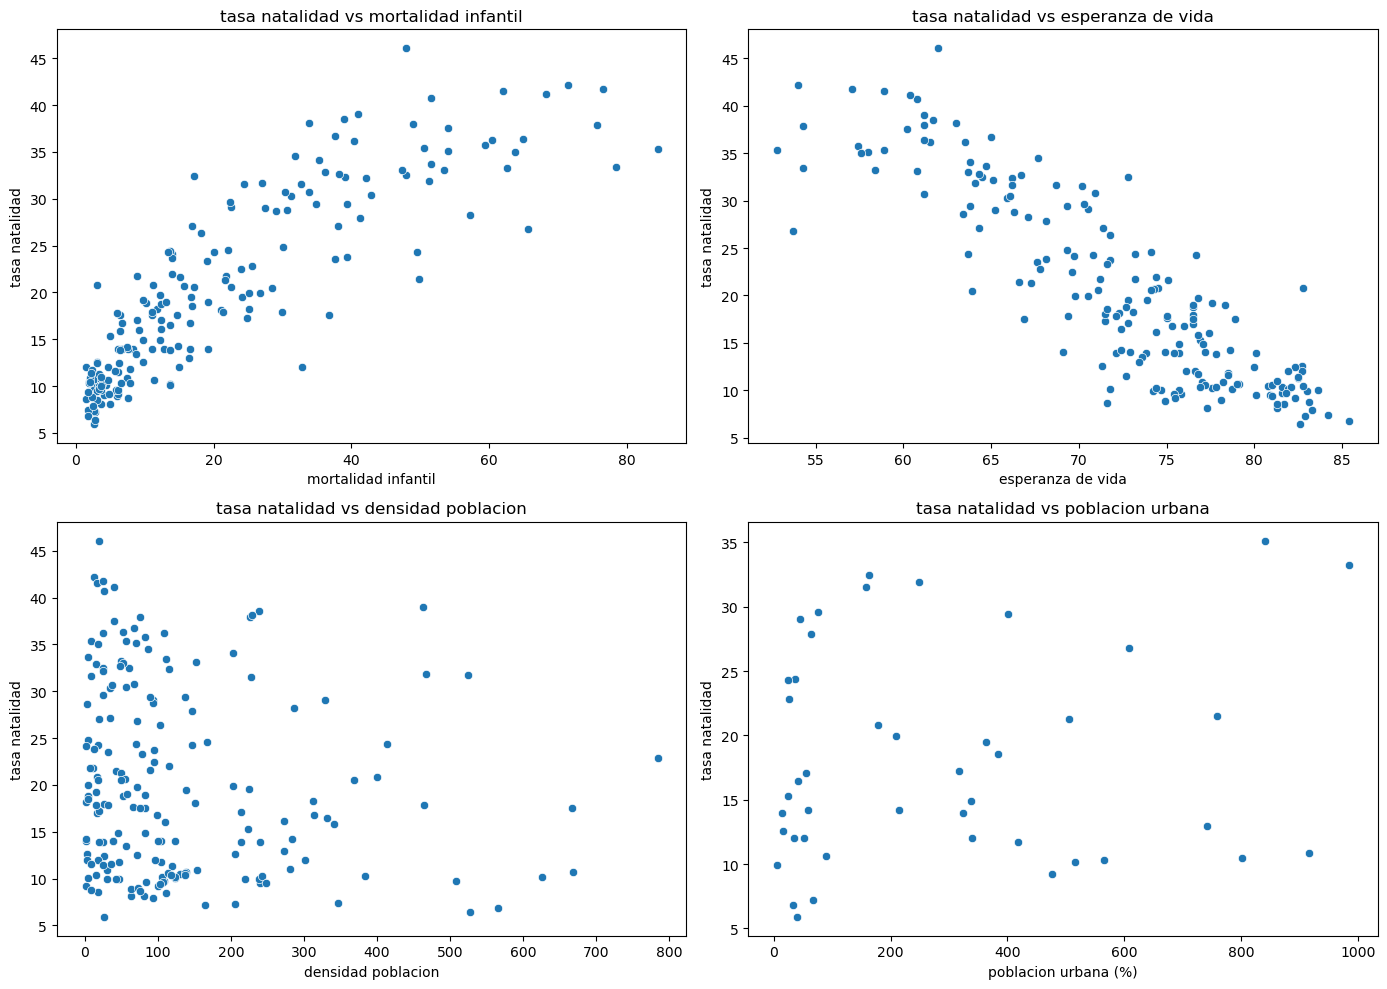

In [28]:
# ¿Existen relaciones visibles entre la tasa de natalidad y las siguientes variables: birth_rate // infant_mortality // life_expectancy // density // urban_population
# tasa de mortalidad infantil, esperanza de vida, densidad de población y población urbana? Usa un subplot. Describe cualquier patrón que encuentres.

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Birth rate vs Infant mortality
sns.scatterplot(data=df, x='infant_mortality', y='birth_rate', ax=axs[0,0])
axs[0,0].set_title('tasa natalidad vs mortalidad infantil')
axs[0,0].set_xlabel('mortalidad infantil')
axs[0,0].set_ylabel('tasa natalidad')

# Birth rate vs Life Expectancy
sns.scatterplot(data=df, x='life_expectancy', y='birth_rate', ax=axs[0,1])
axs[0,1].set_title('tasa natalidad vs esperanza de vida')
axs[0,1].set_xlabel('esperanza de vida')
axs[0,1].set_ylabel('tasa natalidad')

# Birth rate vs Population Density
sns.scatterplot(data=df, x='density', y='birth_rate', ax=axs[1,0])
axs[1,0].set_title('tasa natalidad vs densidad poblacion')
axs[1,0].set_xlabel('densidad poblacion')
axs[1,0].set_ylabel('tasa natalidad')

# Birth rate vs Urban Population
sns.scatterplot(data=df, x='urban_population', y='birth_rate', ax=axs[1,1])
axs[1,1].set_title('tasa natalidad vs poblacion urbana')
axs[1,1].set_xlabel('poblacion urbana (%)')
axs[1,1].set_ylabel('tasa natalidad')

plt.tight_layout()
plt.show()

In [ ]:
# Grafica 1  Tasa natalidad & Mortalidad infantil: a menos mortalidad infantil, menor natalidad 

# Grafica 2  Tasa natalidad & Esperanza de vida: A mayor esperanza de vida menor tasa de natalidad

# Grafica 3 y 4: En estas graficas no vemos relación directa entre las dos variables. 
# En la primera vemos que la mayoría de los datos de densidad de población están entre 0 y 400 pero no vemos relación con la tasa de natalidad ya que esta está dispersa.
# 

Requisitos que deben cumplir las gráficas (en caso de usar alguna de ellas):

Todas deben llevar título.

Los nombres de los ejes deben estar en castellano.

En los scatterplot los puntos deben tener un tamaño de 2.

En los scatterplot los puntos deben tener un color diferente al azul.

En los barplot las barras siempre tienen que estar ordenadas de mayor a menor.

En los barplot y countplot las barras tienen que tener un color diferente a los que vienen por defecto.

En los pieplot siempre tenemos que añadir la etiqueta de a que % corresponde cada quesito.